In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datos = pd.read_csv('teleco.csv')
df = pd.DataFrame(datos)
df

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [3]:
## BORRAMOS COLUMNAS INNCESARIAS 
df = df.drop(['customerID'], axis=1)

In [4]:
### OBSERVAMOS LOS DATOS QUE FORMAN PARTE DE ESTAS COLUMNAS 
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [5]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [6]:
## PRIMERO VAMOS A PASAR LA COLUMNA CHURM A BINARIO

df = pd.get_dummies(df, columns=['Churn','PhoneService','PaperlessBilling'], drop_first=True)
df.rename(columns={'Churn_Yes': 'Churn', 'PhoneService_Yes': 'PhoneService', 'PaperlessBilling_Yes':'PaperlessBilling'}, inplace=True)
df

,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PhoneService,PaperlessBilling
0,1,Month-to-month,Electronic check,29.85,29.85,0,0,1
1,34,One year,Mailed check,56.95,1889.5,0,1,0
2,2,Month-to-month,Mailed check,53.85,108.15,1,1,1
3,45,One year,Bank transfer (automatic),42.30,1840.75,0,0,0
4,2,Month-to-month,Electronic check,70.70,151.65,1,1,1
...,...,...,...,...,...,...,...,...
7037,72,Two year,Bank transfer (automatic),21.15,1419.4,0,1,1
7038,24,One year,Mailed check,84.80,1990.5,0,1,1
7039,72,One year,Credit card (automatic),103.20,7362.9,0,1,1
7040,11,Month-to-month,Electronic check,29.60,346.45,0,0,1


In [7]:
df = pd.get_dummies(df, columns=['Contract','PaymentMethod'])
df

,tenure,MonthlyCharges,TotalCharges,Churn,PhoneService,PaperlessBilling,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,1,0,0,0,0,1,0
1,34,56.95,1889.5,0,1,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,1,1,0,0,0,0,0,1
3,45,42.30,1840.75,0,0,0,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,72,21.15,1419.4,0,1,1,0,0,1,1,0,0,0
7038,24,84.80,1990.5,0,1,1,0,1,0,0,0,0,1
7039,72,103.20,7362.9,0,1,1,0,1,0,0,1,0,0
7040,11,29.60,346.45,0,0,1,1,0,0,0,0,1,0


In [8]:

## PASAMOS LA COLUMNA CHURN COMO PRIMERA PARA PODER SELECCIONARLA MEJOR
def re_lista(x,y):
    l1 = x.copy()
    i1 = x.index(y)
    el1 = [l1[i1]]
    l1.remove(el1[0])
    return el1 + l1




cols = list(df.columns)
df = df[re_lista(cols,'Churn')]
df

,Churn,tenure,MonthlyCharges,TotalCharges,PhoneService,PaperlessBilling,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,1,0,0,0,0,1,0
1,0,34,56.95,1889.5,1,0,0,1,0,0,0,0,1
2,1,2,53.85,108.15,1,1,1,0,0,0,0,0,1
3,0,45,42.30,1840.75,0,0,0,1,0,1,0,0,0
4,1,2,70.70,151.65,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,72,21.15,1419.4,1,1,0,0,1,1,0,0,0
7038,0,24,84.80,1990.5,1,1,0,1,0,0,0,0,1
7039,0,72,103.20,7362.9,1,1,0,1,0,0,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,0,0,0,1,0


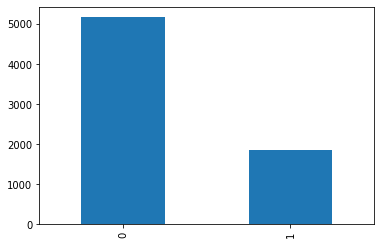

In [9]:
df['Churn'].value_counts().plot(kind='bar')
plt.show()

## AQUI PODEMOS OBSERVAR UN DESBALANCE EN LOS DATOS POR LO QUE MAS ADELANTE DEBEMOS CORREGIR ESTO YA SEA DESDE LOS PARAMETROS
## DEL MODELO  O UTULIZANDO Subsampling O Oversampling

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

## ASTYPE NO FUNCIONA YA QUE EXISTEN VALORES NO NUMEROS POR LO QUE USAMOS ESTE CODIGO
## EL CUA LTRANSFORMA LOS NO NUMERICOS EN NAN
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [24]:
## AHORA YA PODEMOS HACER MEJOR EL MODELO 
X = df.iloc[:,1:14]
Y = df['Churn']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.20)
modelR = LogisticRegression(solver='lbfgs', max_iter=1000,class_weight= 'balanced',penalty='l2')
modelSV =  SVC(probability=True) ## GAMMA COMO PARAMETRO SE ESCARGA DE LA SUAVIDAD DE LOS LIMITES, UN GAMA MUY ALTO = OVERFITTING
##AQUI LE AGREGAMOS ESTOS NUEVOS PARAMETROS PORQUE LA TARGET ESTA DEMASIADO DESBALANCEADA
modelR.fit(X_train,Y_train)
modelSV.fit(X_train, Y_train)
Y_predicR = modelR.predict(X_test)
Y_predicSV = modelSV.predict(X_test)

In [25]:
## VERIFICAMOS EL MODELO 
print(modelR.score(X_test,Y_test))
print(modelSV.score(X_test,Y_test))

0.7232871849485268
0.7376641817536386


In [26]:
## Observamos mas metricas
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(Y_test, Y_predic)
print(matriz)

[[2396 1760]
 [ 859  619]]


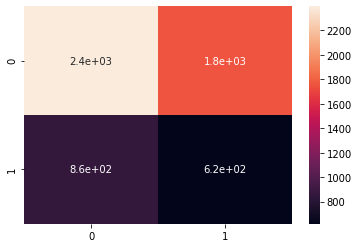

In [39]:
sns.heatmap(matriz, annot=True)
plt.show()

In [27]:
## OBSERVAMOS LAS METRICAS FALTANTES
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_predic)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.58      0.65      4156
           1       0.26      0.42      0.32      1478

    accuracy                           0.54      5634
   macro avg       0.50      0.50      0.48      5634
weighted avg       0.61      0.54      0.56      5634



#### CURVAS ROC - AUC PARA REGRESION LOGISTICA Y SVC
En este caso se usaran los dos algoritmos lineales para la clasificacion y se evaluaran los comportamientos de las curvas donde la curva ROC representa en el eje x los FP y en el eje y los PV. Mientras que AUC es el area bajo la curva de las probabilidades


###### Probaremos esto con diferentes modelos

In [38]:
## CUANDO SE HACE CLASIFICACION MULTICLASE NO SE PUEDE EVALUAR LAS ROC

LR_prob = modelR.predict_proba(X_test)
SV_prob = modelSV.predict_proba(X_test)
LR_prob = LR_prob[:,1]
SV_prob = SV_prob[:,1]
from sklearn.metrics import roc_curve, roc_auc_score

## CALCULAMOS LA CURVA AUROC

## COMO ES UN PROBLEMA DE CLASIFACION BINARIA NO SE PUEDE HACER ESTUDIO DE AUC_ROC PERO DEJARE EL EJEMPLO PARA BINARIA
lr_auroc = roc_auc_score(Y_test, LR_prob)
sv_auroc = roc_auc_score(Y_test, LR_prob)

In [36]:
rlr_fpr, rlr_tpr, _ = roc_curve(Y_test, LR_prob)
rsv_fpr, rsv_tpr, _ = roc_curve(Y_test, SV_prob)

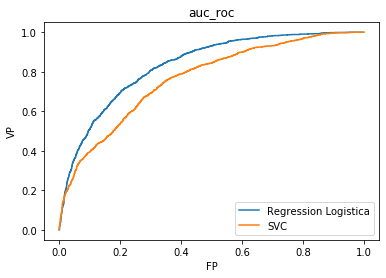

In [37]:
plt.plot(rlr_fpr, rlr_tpr, label = 'Regression Logistica' % lr_auroc)
plt.plot(rsv_fpr, rsv_tpr, label = 'SVC' % sv_auroc)
plt.title('auc_roc')
plt.xlabel('FP')
plt.ylabel('VP')
plt.legend()
plt.show()

## RECORDAR QUE EL MEJOR MODELO ES AQUEL QUE SE AJUSTE MEJOR A LA ESQUINA SUPERIOR IZQUIERDA Y POR ENDE MAYOR AREA BAJO LA CURVA